In [11]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('data_mean.csv')

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
dataset['Class'].value_counts()

Class
0.000000    283253
1.000000       473
0.001667        71
Name: count, dtype: int64

In [21]:
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [25]:
legit_sample = legit.sample(n=473)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset['Class'].value_counts()

Class
0.0    473
1.0    473
Name: count, dtype: int64

In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (662, 30) (284, 30)


In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=2, max_iter=200),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=2),
    "Random Forest Classifier": RandomForestClassifier(random_state=2),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', random_state=2),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Initialize lists to store mean, max, and min results for each metric
rows = []

# Use cross-validation to evaluate each classifier
for name, clf in classifiers.items():
    # Cross-validation predictions
    y_pred = cross_val_predict(clf, X_train_scaled, Y_train, cv=5)
    
    # Calculate metrics across cross-validation folds
    accuracy = accuracy_score(Y_train, y_pred)
    precision = precision_score(Y_train, y_pred, average='weighted', zero_division=0)
    recall = recall_score(Y_train, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_train, y_pred, average='weighted', zero_division=0)
    
    # Store metrics in a list
    rows.append({
        "Classifier": name,
        "Mean Accuracy": f"{accuracy:.4f}",
        "Mean Precision": f"{precision:.4f}",
        "Mean Recall": f"{recall:.4f}",
        "Mean F1 Score": f"{f1:.4f}"
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(rows)

print("\nSummary of Cross-Validated Results:")
print(results_df)



Summary of Cross-Validated Results:
                     Classifier Mean Accuracy Mean Precision Mean Recall  \
0           Logistic Regression        0.9396         0.9419      0.9396   
1      Decision Tree Classifier        0.8912         0.8913      0.8912   
2      Random Forest Classifier        0.9320         0.9338      0.9320   
3  Support Vector Machine (SVM)        0.9260         0.9288      0.9260   
4     K-Nearest Neighbors (KNN)        0.9079         0.9149      0.9079   
5                   Naive Bayes        0.9109         0.9155      0.9109   

  Mean F1 Score  
0        0.9395  
1        0.8912  
2        0.9320  
3        0.9259  
4        0.9075  
5        0.9106  


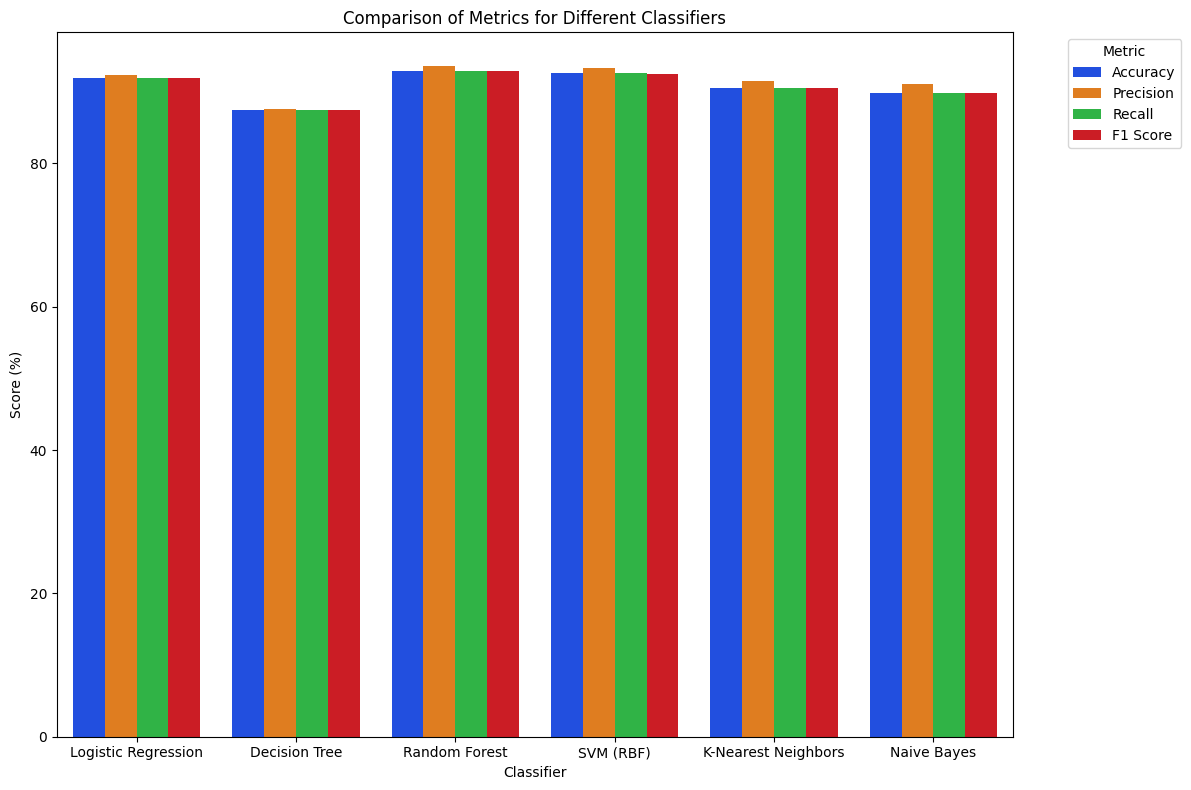

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary to store metrics
metrics = {
    "Classifier": [],
    "Metric": [],
    "Score": []
}

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=2, max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "Random Forest": RandomForestClassifier(random_state=2),
    "SVM (RBF)": SVC(kernel='rbf', random_state=2),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)
    
    # Calculate metrics
    acc = accuracy_score(Y_test, Y_pred)
    # Calculate metrics with zero_division=0
    precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, Y_pred, average='weighted', zero_division=0)

    
    # Store metrics in the dictionary
    metrics["Classifier"].extend([name] * 4)
    metrics["Metric"].extend(["Accuracy", "Precision", "Recall", "F1 Score"])
    metrics["Score"].extend([acc * 100, precision * 100, recall * 100, f1 * 100])

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x="Classifier", y="Score", hue="Metric", palette="bright")
plt.title("Comparison of Metrics for Different Classifiers")
plt.ylabel("Score (%)")
plt.xlabel("Classifier")
plt.xticks(rotation=0)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
